In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


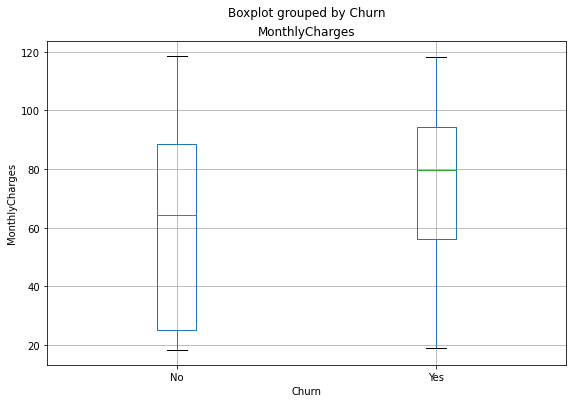

In [8]:
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
df.boxplot(column='MonthlyCharges',by='Churn',ax=ax)
ax.set_ylabel("MonthlyCharges")
plt.show()

In [9]:
df['Class']=df['Churn'].apply(lambda x :1 if x=='Yes' else 0)


In [10]:
df['Class']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Class, Length: 7043, dtype: int64

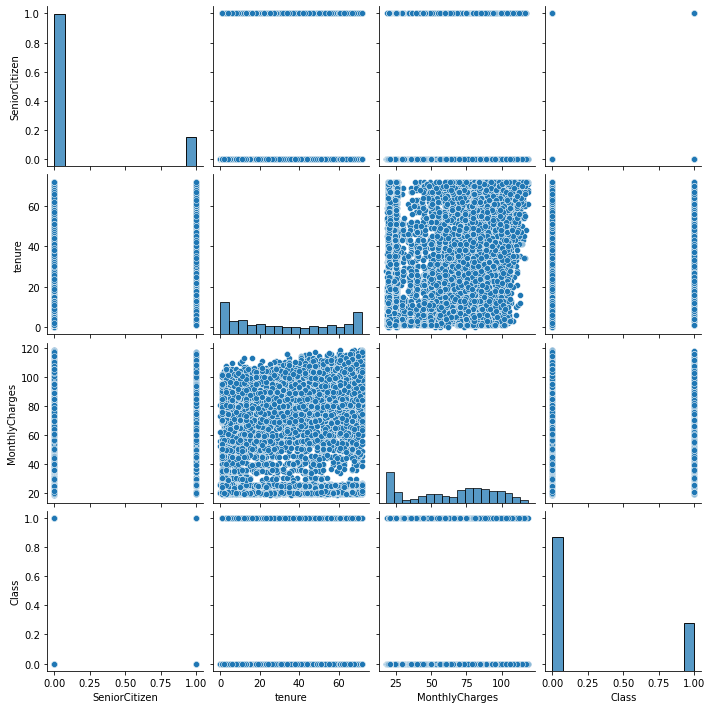

In [12]:
sns.pairplot(df)

In [13]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [17]:
X = df[['tenure','MonthlyCharges']]
y= df['Class']

In [21]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=1)

In [22]:
x_train.shape

(5634, 2)

In [23]:
x_test.shape

(1409, 2)

In [24]:
logr= LogisticRegression()

In [25]:
logr.fit(x_train,y_train)

LogisticRegression()

In [27]:
logr.coef_

array([[-0.05474134,  0.03325319]])

In [28]:
logr.intercept_

array([-1.79926124])

In [29]:
y_train_pred=logr.predict(x_train)
y_test_pred=logr.predict(x_test)

In [31]:
accuracy_score(y_train_pred,y_train)

0.7797302094426695

In [32]:
accuracy_score(y_test_pred,y_test)

0.7970191625266146

In [33]:
confusion_matrix(y_test,y_test_pred)

array([[965,  96],
       [190, 158]], dtype=int64)

In [34]:
confusion_matrix(y_train,y_train_pred)

array([[3714,  399],
       [ 842,  679]], dtype=int64)

In [42]:
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1061
           1       0.62      0.45      0.52       348

    accuracy                           0.80      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.80      0.79      1409

